# CRC Workshop: Machine Learning with Functional Connectivity (FC) Data


## The AOMIC Data

First, lets load the data and inspect it a bit. The [AOMIC dataset](https://nilab-uva.github.io/AOMIC.github.io/) is a collection data obtained in three different studies (**PIOP1**, **PIOP2**, **ID1000**). Here, we will be only concerned with the data from the **ID1000** study, which aimed to collect 1000 fMRI scans during movie-watching. The next cell defines the path to all the **ID1000** specific data, and also adds the names of the two files we will be interested in. One of these files contains the preprocessed **functional connectivity (FC)** data, whereas the other file contains the important **demographic** information. Let's start by also loading the dependencies:

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Path to ID1000 data within the AOMIC datalad dataset
ID1000_path = (
    Path("..") / "aomic-fc"/ "junifer_storage" / 
    "JUNIFER_AOMIC_TSV_CONNECTOMES" / "ID1000"
)

# Path to the demographics data file
demographics_path = ID1000_path / "ID1000_participants.tsv"

# Path to the connectomes data file
# The name of this file is a bit of a mouthful but contains important
# information
connectomes_path = ID1000_path / (
    "ID1000_BOLD_parccortical-Schaefer100x17FSLMNI_"
    "parcsubcortical-TianxS2x3TxMNInonlinear2009cAsym_"
    "marker-empiricalFC_moviewatching.tsv.gz"
)

### Demographic Data

Now that we have defined these paths let's load each file and look at them one by one. Let's start with the demographics. We will load it using pandas, and as you might see from the file extension, these are both **tsv** files and we will therefore load them using a tab as a delimiter. In addition, we will load the first column as the index of the dataframe as it happens to contain the subject ID's.

In [3]:
demographics = pd.read_csv(demographics_path, sep="\t", index_col=0)
demographics

,age,sex,handedness,BMI,education_level,background_SES,IST_fluid,IST_memory,IST_crystallised,IST_intelligence_total,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-0001,22.00,female,right,23,medium,2.0,77.0,49.0,33.0,159.0,...,7.0,1.0,1.0,7.0,no,yes,2.0,6.312,6.312,6.312
sub-0002,21.75,female,right,20,medium,5.5,97.0,63.0,39.0,199.0,...,7.0,1.0,2.0,7.0,no,no,NaN,NaN,6.311,6.311
sub-0003,25.25,female,right,31,high,3.0,122.0,67.0,38.0,227.0,...,6.0,3.0,1.0,6.0,no,no,NaN,6.312,6.312,6.312
sub-0004,22.50,female,right,20,high,5.0,149.0,69.0,52.0,270.0,...,6.0,2.0,1.0,7.0,yes,no,NaN,6.311,6.311,6.311
sub-0005,22.25,male,right,23,high,4.5,112.0,57.0,43.0,212.0,...,1.0,7.0,6.0,1.0,no,no,NaN,6.311,6.311,6.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-0924,22.25,male,right,21,medium,3.0,136.0,56.0,54.0,246.0,...,2.0,6.0,4.0,4.0,no,no,NaN,6.374,6.374,6.374
sub-0925,25.25,male,right,30,medium,4.0,64.0,37.0,49.0,150.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.311,6.311,6.311
sub-0926,20.75,male,right,22,high,2.0,84.0,44.0,33.0,161.0,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312


We can see some of the standard demographic variables, like "age", "sex", "BMI", and so on. As you might be able to tell, however, this file not *only* contains "demographic" information but also some other participant data, as for example cognitive measurements (e.g. "IST_memory", "IST_fluid").

### Connectomes

Let us now check the connectomes out to see for which subjects we have preprocessed functional connectivity data available.

In [4]:
connectomes = pd.read_csv(connectomes_path, sep="\t", index_col=0, compression="gzip")
connectomes

,LH_VisCent_ExStr_2~LH_VisCent_ExStr_1,LH_VisCent_Striate_1~LH_VisCent_ExStr_1,LH_VisCent_Striate_1~LH_VisCent_ExStr_2,LH_VisCent_ExStr_3~LH_VisCent_ExStr_1,LH_VisCent_ExStr_3~LH_VisCent_ExStr_2,LH_VisCent_ExStr_3~LH_VisCent_Striate_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_2,LH_VisPeri_ExStrInf_1~LH_VisCent_Striate_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_3,...,pCAU-lh~THA-VP-lh,pCAU-lh~THA-VA-lh,pCAU-lh~THA-DA-lh,pCAU-lh~NAc-shell-lh,pCAU-lh~NAc-core-lh,pCAU-lh~pGP-lh,pCAU-lh~aGP-lh,pCAU-lh~aPUT-lh,pCAU-lh~pPUT-lh,pCAU-lh~aCAU-lh
sub-0001,0.533892,0.638701,0.560450,0.789158,0.466875,0.539399,0.677232,0.366597,0.361958,0.564919,...,0.072425,0.366347,0.327794,-0.069095,0.468919,-0.071477,0.040889,0.212324,0.173870,0.664122
sub-0002,0.641335,0.663375,0.545326,0.629451,0.187963,0.390782,0.670098,0.116997,0.397939,0.742349,...,-0.048029,0.294397,0.247182,0.050190,0.069237,-0.133454,0.011535,0.265424,0.147957,0.587463
sub-0003,0.657928,0.742613,0.453348,0.860049,0.523853,0.591320,0.770457,0.418997,0.645827,0.725303,...,-0.145307,0.240758,-0.014584,0.125811,0.397896,0.112837,0.292399,0.473047,0.224996,0.711400
sub-0004,0.788957,0.694655,0.660015,0.732351,0.517771,0.387978,0.620954,0.283812,0.426040,0.622988,...,0.288743,0.276673,0.355181,0.250076,0.216825,-0.064241,0.045752,0.379170,0.226584,0.388584
sub-0005,0.594372,0.761742,0.667648,0.791777,0.467393,0.515712,0.285025,-0.306764,0.179985,0.250133,...,-0.009222,0.393067,0.032954,0.220143,0.289458,0.012017,0.073975,0.515776,0.426828,0.701249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-0923,0.580657,0.581537,0.456695,0.852308,0.345382,0.325712,0.656729,0.186045,0.466766,0.692227,...,0.356343,0.386007,0.461522,-0.158422,0.364220,-0.159627,-0.157892,0.505149,0.343721,0.622666
sub-0924,0.772896,0.576773,0.382912,0.857393,0.595229,0.373345,0.384935,0.119016,0.407748,0.466081,...,-0.001937,0.384416,0.317110,-0.004191,0.178207,-0.105206,0.375226,0.427756,0.441114,0.711478
sub-0925,0.836000,0.674962,0.643015,0.708971,0.593741,0.415912,0.240876,0.030883,0.435190,0.354092,...,-0.123305,0.391051,0.101072,0.482087,0.363243,0.259769,0.127300,0.283468,0.446741,0.472104
sub-0926,0.699854,0.751275,0.615963,0.834274,0.421496,0.565254,0.829891,0.371156,0.578320,0.874583,...,0.179298,0.550858,0.605740,0.030332,0.411371,0.123619,0.216562,0.465273,0.301320,0.666110


In this dataframe again, **each row** corresponds to *one subject* from the study. **Each column** represents a *unique pairwise relationship* between two brain areas (also called an *edge* in graph theory terminology). That is, since a brain parcellation with **N** areas results in an **NxN** symmetric correlation matrix per subject, one half of a subjects matrix is discarded. Similarly, the diagonal of this correlation matrix is also typically discarded as the correlation of an area with itself is always 1. The remaining entries can be stacked and result in one row of this dataframe. Thus, each row contains **N x (N-1) / 2** entries. In our case, since the connectomes were processed with a combination of the Schaefer 100 cortical parcellation and the Tian 32 subcortical parcellation, this results in **100 x (100 - 1) / 2 = 8646** columns. This concept is illustrated by the graphic below:

![title](images/connectomes.png)


### Subsetting the data

As you can see, the first dataframe on demographics contains 928 rows (i.e. subjects), whereas the second dataframe contains 877 rows. Let us for further analyses only select subjects for which we actually have connectomes. But first, let's also make sure, that we identify any 'NaN' values in the functional connectivity data and remove subjects with any 'NaN' entries.

The pandas **isna()** method will check for each entry in the dataframe whether it is 'NaN' or not. That is, if an entry is 'NaN' it will return True and otherwise it will return False. We can use this to identify the indices (i.e. subjects) for which there are 'NaN' entries by combining it with the **any()** method provided by pandas.

First see the output from **isna()**:

In [5]:
isna = connectomes.isna()
isna

,LH_VisCent_ExStr_2~LH_VisCent_ExStr_1,LH_VisCent_Striate_1~LH_VisCent_ExStr_1,LH_VisCent_Striate_1~LH_VisCent_ExStr_2,LH_VisCent_ExStr_3~LH_VisCent_ExStr_1,LH_VisCent_ExStr_3~LH_VisCent_ExStr_2,LH_VisCent_ExStr_3~LH_VisCent_Striate_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_2,LH_VisPeri_ExStrInf_1~LH_VisCent_Striate_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_3,...,pCAU-lh~THA-VP-lh,pCAU-lh~THA-VA-lh,pCAU-lh~THA-DA-lh,pCAU-lh~NAc-shell-lh,pCAU-lh~NAc-core-lh,pCAU-lh~pGP-lh,pCAU-lh~aGP-lh,pCAU-lh~aPUT-lh,pCAU-lh~pPUT-lh,pCAU-lh~aCAU-lh
sub-0001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-0923,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0924,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub-0926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The **any()** method will return whether any element along a given axis (i.e. along a row or a column) is True. The following output should be "True" therefore, if a subject has 'NaN' values and "False" otherwise:

In [6]:
isna_any = isna.any(axis=1)
isna_any

sub-0001    False
sub-0002    False
sub-0003    False
sub-0004    False
sub-0005    False
            ...  
sub-0923    False
sub-0924    False
sub-0925    False
sub-0926    False
sub-0927    False
Length: 877, dtype: bool

We can do calculations on these boolean values as if they are 0's and 1's. That is, "True" will be counted as 1 and "False" will be counted as 0. We can therefore use the **.sum()** method to determine the number of 'NaN' values:

In [7]:
isna_any.sum()

0

The output ("0") shows us that there aren't any 'NaN' values, so we can simply proceed with the data we have here. Let us therefore now subset the demographic data for which we have connectomes. That is, we will index the demographics dataset using the index from the connectomes dataset:

In [8]:
subsampled_demographics = demographics.loc[connectomes.index]
subsampled_demographics

,age,sex,handedness,BMI,education_level,background_SES,IST_fluid,IST_memory,IST_crystallised,IST_intelligence_total,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
sub-0001,22.00,female,right,23,medium,2.0,77.0,49.0,33.0,159.0,...,7.0,1.0,1.0,7.0,no,yes,2.0,6.312,6.312,6.312
sub-0002,21.75,female,right,20,medium,5.5,97.0,63.0,39.0,199.0,...,7.0,1.0,2.0,7.0,no,no,NaN,NaN,6.311,6.311
sub-0003,25.25,female,right,31,high,3.0,122.0,67.0,38.0,227.0,...,6.0,3.0,1.0,6.0,no,no,NaN,6.312,6.312,6.312
sub-0004,22.50,female,right,20,high,5.0,149.0,69.0,52.0,270.0,...,6.0,2.0,1.0,7.0,yes,no,NaN,6.311,6.311,6.311
sub-0005,22.25,male,right,23,high,4.5,112.0,57.0,43.0,212.0,...,1.0,7.0,6.0,1.0,no,no,NaN,6.311,6.311,6.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-0923,21.75,male,right,19,medium,3.0,70.0,49.0,34.0,153.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.733,6.733,6.733
sub-0924,22.25,male,right,21,medium,3.0,136.0,56.0,54.0,246.0,...,2.0,6.0,4.0,4.0,no,no,NaN,6.374,6.374,6.374
sub-0925,25.25,male,right,30,medium,4.0,64.0,37.0,49.0,150.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.311,6.311,6.311
sub-0926,20.75,male,right,22,high,2.0,84.0,44.0,33.0,161.0,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312


The indexing using the **.loc()** method importantly also ensures that the rows in both dataframes are in the same order which will be important later when we convert them to numpy arrays, a data structure that scikit-learn understands.

### Exploring our sample:

Now that the samples in the connectome data and the demographics data are matched, let's take a quick look at sex and age to get an overview of our sample.

The **value_counts()** method takes a pandas series (i.e. a column from the dataframe) and counts the amount of times each possible value is contained in the column. This is a good way of discovering what values are possible for a specific variable, and how many instances there are for each value. This is useful for example when looking at categorial variables, for example "sex":

In [9]:
subsampled_demographics["sex"].value_counts()

female    454
male      423
Name: sex, dtype: int64

The **plot.hist()** pandas method provides a quick way of making a histogram that we can also group by "sex" to look at each distribution seperately: 

array([<AxesSubplot: title={'center': 'female'}, ylabel='Frequency'>,
       <AxesSubplot: title={'center': 'male'}, ylabel='Frequency'>],
      dtype=object)

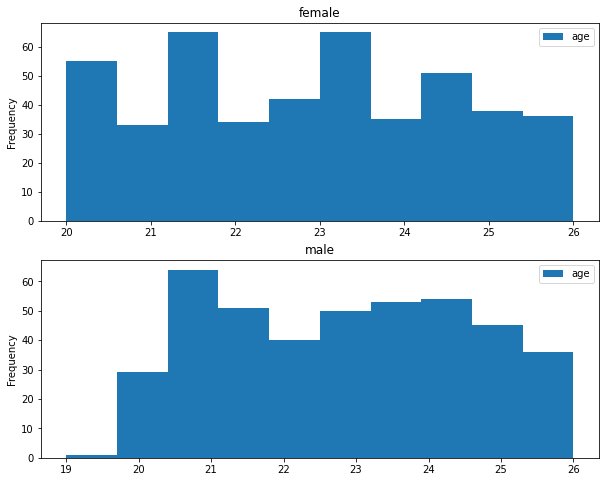

In [10]:
subsampled_demographics.plot.hist(column=["age"], by="sex", figsize=(10, 8))

As you can see, the age range is quite narrow, and limited to young people. This is a common problem in neuroimaging or psychology studies, which often sample students from their universities for convenience. It is always good to be aware of these limitations before starting any complicated machine learning pipeline.

## Preparing the target

Now, lets try to build a model that can predict a measure of intelligence given a functional connectome. That is, the connectomes will be the features ('X') and the measure of intelligence will be the target ('y'). Let us first take a quick look at our target and its distribution. The **.describe()** method that pandas provides can be used to get a quick look over the relevant descriptive statistics that we may care about:


In [11]:
subsampled_demographics["IST_intelligence_total"].describe()

count    875.000000
mean     200.400000
std       40.765557
min       68.000000
25%      172.000000
50%      205.000000
75%      230.000000
max      296.000000
Name: IST_intelligence_total, dtype: float64

We can also quickly plot the histogram and check if there are any NaN values in our target:

array([<AxesSubplot: title={'center': 'female'}, ylabel='Frequency'>,
       <AxesSubplot: title={'center': 'male'}, ylabel='Frequency'>],
      dtype=object)

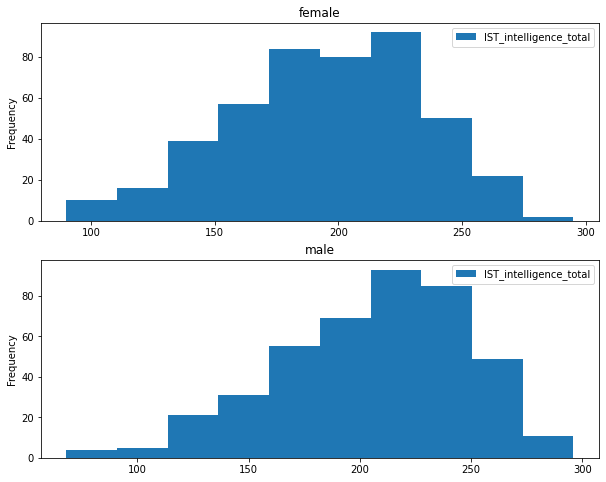

In [12]:
subsampled_demographics.plot.hist(column=["IST_intelligence_total"], by="sex", figsize=(10, 8))

In [13]:
subsampled_demographics["IST_intelligence_total"].isna().sum()

2

The results show that the measure of intelligence is roughly normally distributed between values of 100 and 300 with a mean of 200.4 and a standard deviation of 40.77. We can also see that there are two instances with 'NaN' values which we will have to exclude from the analysis. Let's have a look at the 'NaN' samples.

We can use the return value of the **isna()** method to index the original dataframe to see which samples have the 'NaN' values:

In [14]:
subsampled_demographics[subsampled_demographics["IST_intelligence_total"].isna()]

,age,sex,handedness,BMI,education_level,background_SES,IST_fluid,IST_memory,IST_crystallised,IST_intelligence_total,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
sub-0127,25.25,female,right,24,medium,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312
sub-0390,20.50,female,left,22,medium,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,no,NaN,6.313,6.313,6.313


Likewise, we can use the **~** operator to negate or invert the boolean values of the **isna()** array to index the subjects which do not have 'NaN' values:

In [15]:
exclude_target_nans = subsampled_demographics[~subsampled_demographics["IST_intelligence_total"].isna()].copy()
exclude_target_nans

,age,sex,handedness,BMI,education_level,background_SES,IST_fluid,IST_memory,IST_crystallised,IST_intelligence_total,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
sub-0001,22.00,female,right,23,medium,2.0,77.0,49.0,33.0,159.0,...,7.0,1.0,1.0,7.0,no,yes,2.0,6.312,6.312,6.312
sub-0002,21.75,female,right,20,medium,5.5,97.0,63.0,39.0,199.0,...,7.0,1.0,2.0,7.0,no,no,NaN,NaN,6.311,6.311
sub-0003,25.25,female,right,31,high,3.0,122.0,67.0,38.0,227.0,...,6.0,3.0,1.0,6.0,no,no,NaN,6.312,6.312,6.312
sub-0004,22.50,female,right,20,high,5.0,149.0,69.0,52.0,270.0,...,6.0,2.0,1.0,7.0,yes,no,NaN,6.311,6.311,6.311
sub-0005,22.25,male,right,23,high,4.5,112.0,57.0,43.0,212.0,...,1.0,7.0,6.0,1.0,no,no,NaN,6.311,6.311,6.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-0923,21.75,male,right,19,medium,3.0,70.0,49.0,34.0,153.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.733,6.733,6.733
sub-0924,22.25,male,right,21,medium,3.0,136.0,56.0,54.0,246.0,...,2.0,6.0,4.0,4.0,no,no,NaN,6.374,6.374,6.374
sub-0925,25.25,male,right,30,medium,4.0,64.0,37.0,49.0,150.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.311,6.311,6.311
sub-0926,20.75,male,right,22,high,2.0,84.0,44.0,33.0,161.0,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312


The **exclude_target_nans** dataframe now only contains data that actually has data for our target.

We can convince ourselves that this worked correctly by double checking the 'NaN' count. These types of sanity checks (double checking that your code worked even if you think it is obvious can be extremely useful at catching problems early on):

In [16]:
exclude_target_nans["IST_intelligence_total"].isna().sum()

0

As expected this returns 0, so we are all good. Now we need to just select the same subjects for the connectomes and make sure that rows are in the same order for both features as well as the target. We can do this by indexing the connectones using the index from our target data:

In [17]:
subsampled_connectomes = connectomes.loc[exclude_target_nans.index]
subsampled_connectomes

,LH_VisCent_ExStr_2~LH_VisCent_ExStr_1,LH_VisCent_Striate_1~LH_VisCent_ExStr_1,LH_VisCent_Striate_1~LH_VisCent_ExStr_2,LH_VisCent_ExStr_3~LH_VisCent_ExStr_1,LH_VisCent_ExStr_3~LH_VisCent_ExStr_2,LH_VisCent_ExStr_3~LH_VisCent_Striate_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_2,LH_VisPeri_ExStrInf_1~LH_VisCent_Striate_1,LH_VisPeri_ExStrInf_1~LH_VisCent_ExStr_3,...,pCAU-lh~THA-VP-lh,pCAU-lh~THA-VA-lh,pCAU-lh~THA-DA-lh,pCAU-lh~NAc-shell-lh,pCAU-lh~NAc-core-lh,pCAU-lh~pGP-lh,pCAU-lh~aGP-lh,pCAU-lh~aPUT-lh,pCAU-lh~pPUT-lh,pCAU-lh~aCAU-lh
sub-0001,0.533892,0.638701,0.560450,0.789158,0.466875,0.539399,0.677232,0.366597,0.361958,0.564919,...,0.072425,0.366347,0.327794,-0.069095,0.468919,-0.071477,0.040889,0.212324,0.173870,0.664122
sub-0002,0.641335,0.663375,0.545326,0.629451,0.187963,0.390782,0.670098,0.116997,0.397939,0.742349,...,-0.048029,0.294397,0.247182,0.050190,0.069237,-0.133454,0.011535,0.265424,0.147957,0.587463
sub-0003,0.657928,0.742613,0.453348,0.860049,0.523853,0.591320,0.770457,0.418997,0.645827,0.725303,...,-0.145307,0.240758,-0.014584,0.125811,0.397896,0.112837,0.292399,0.473047,0.224996,0.711400
sub-0004,0.788957,0.694655,0.660015,0.732351,0.517771,0.387978,0.620954,0.283812,0.426040,0.622988,...,0.288743,0.276673,0.355181,0.250076,0.216825,-0.064241,0.045752,0.379170,0.226584,0.388584
sub-0005,0.594372,0.761742,0.667648,0.791777,0.467393,0.515712,0.285025,-0.306764,0.179985,0.250133,...,-0.009222,0.393067,0.032954,0.220143,0.289458,0.012017,0.073975,0.515776,0.426828,0.701249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-0923,0.580657,0.581537,0.456695,0.852308,0.345382,0.325712,0.656729,0.186045,0.466766,0.692227,...,0.356343,0.386007,0.461522,-0.158422,0.364220,-0.159627,-0.157892,0.505149,0.343721,0.622666
sub-0924,0.772896,0.576773,0.382912,0.857393,0.595229,0.373345,0.384935,0.119016,0.407748,0.466081,...,-0.001937,0.384416,0.317110,-0.004191,0.178207,-0.105206,0.375226,0.427756,0.441114,0.711478
sub-0925,0.836000,0.674962,0.643015,0.708971,0.593741,0.415912,0.240876,0.030883,0.435190,0.354092,...,-0.123305,0.391051,0.101072,0.482087,0.363243,0.259769,0.127300,0.283468,0.446741,0.472104
sub-0926,0.699854,0.751275,0.615963,0.834274,0.421496,0.565254,0.829891,0.371156,0.578320,0.874583,...,0.179298,0.550858,0.605740,0.030332,0.411371,0.123619,0.216562,0.465273,0.301320,0.666110


As a last step before we start training models, lets turn the data into a format that sklearn understands: the **numpy array**:

In [18]:
import numpy as np


X = np.array(subsampled_connectomes)
y = np.array(exclude_target_nans["IST_intelligence_total"])

### Train-test split

Let us first split the data so we have one hold-out validation set that will be left untouched for now.

In [19]:
from sklearn.model_selection import train_test_split

X_model_selection, X_holdout, y_model_selection, y_holdout = train_test_split(X, y, random_state=25)

### Fitting a bunch of models

Every problem, every classification or regression task is different, and therefore requires a different model. That is, which model works best depends on the underlying processes that generate the distribution of our X and on the "true" function that maps X to y. In other words, we cannot really know which model will work best before we try it out. Let us test out a few popular options therefore starting with a **Ridge Regression**.

In [20]:
from sklearn.linear_model import Ridge

However, if we check out the **sklearn documentation**, we see that the **Ridge Regression estimator** has a parameter called **alpha**, which can be set to a positive floating point value. This is a **hyperparameter**, *that must be set by the user and cannot be fitted based on the data*. How can we know which value is the best one? First, run the code in the next cell to see the documentation:

In [21]:
?Ridge

A simple approach would be to try out a number of different **candidate values** for **alpha** and see how well they compare to each other. That is, we could define a **grid** of candidate values, and **search** the candidate that gives us the best outcome. In order to make sure the estimate of the goodness of the outcome (i.e. our estimate of the error) is not dependent on a specific train-test split, we want to perform a cross-validation for every candidate value.

Scikit-learn allows us to perform **model selection using a cross-validated gridsearch** using the **GridSearchCV** object. Let's import it:

In [22]:
from sklearn.model_selection import GridSearchCV

Let's check out the documentation:

In [23]:
?GridSearchCV

We can see many parameters, but there are 4 which we care about predominantly:

1. **"estimator"** -> our sklearn estimator object (i.e. the model class)
2. **"param_grid"** -> the grid of hyperparameters to search
3. **"scoring"** -> which scoring metric to use
4. **"cv"** -> the cross-validation scheme to use
   

Let's for the moment, let's go with the example of the ridge regressor, for which we want to tune the alpha value. We can define the estimator as:

In [24]:
ridge = Ridge()

The **param_grid** parameter typically is handed over as a **dictionary** in which the **keys** consist of the names of the parameters that are to be set for the estimator, and the **values** of the dictionary each yield an **iterable** (for example a **list**) of **possible candidate values** for each parameter.

For example, for our ridge classifier, we can define a very simple grid, that only searches the value for one parameter (the alpha parameter) as follows. Note, that this is only an example grid and should not serve you as a future reference as a grid for a ridge regressor (that is, don't just blindly copy this grid if you want to use a ridge regressor in your work). The values that you choose for your grid can highly depend on your goals and the problem at hand, but it can also help to search the literature that has used the models you want to use and see how they may have defined a grid to search:

In [25]:
param_grid_ridge = {
    "alpha": [0.001, 0.01, 0.1, 1, 2, 10, 50, 100, 200, 300, 500, 1000]
}

The scoring parameter defines which scoring metric we care about, i.e. which scoring metric should be optimised by the grid search. It can be a string if the metric is already in-built in sklearn. For simplicity we will use ["r2_score"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) here, otherwise known as coefficient of determination.

To see what other metrics are available check out this: https://scikit-learn.org/stable/modules/model_evaluation.html

In [26]:
scoring = "r2"

Lastly, the "cv" parameter can be any scikit-learn compatible cross-validation scheme. Here we will use a simple 5-fold cross-validation. We should also make sure that the KFold cv shuffles the data, but with a specific random state, so that the results are reproducible:

In [27]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

We can then initialise the GridSearchCV object, and fit it like any other scikit-learn estimator:

In [28]:
gridsearchcv = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    scoring=scoring,
    cv=kfold
)

gridsearchcv.fit(X_model_selection, y_model_selection)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 10, 50, 100, 200,
                                   300, 500, 1000]},
             scoring='r2')

The GridSearchCV has an **attribute** called **cv_results_** which we can access as follows:

In [29]:
gridsearchcv.cv_results_

{'mean_fit_time': array([0.09282632, 0.11584849, 0.09793744, 0.09436107, 0.10389676,
        0.08721805, 0.10075188, 0.10695343, 0.1005435 , 0.09351802,
        0.08637204, 0.08658805]),
 'std_fit_time': array([0.00784268, 0.0103497 , 0.01153744, 0.00612204, 0.01519787,
        0.00249519, 0.01112908, 0.00096267, 0.00588215, 0.00552049,
        0.00209608, 0.00213963]),
 'mean_score_time': array([0.00372109, 0.00243764, 0.00197649, 0.0016489 , 0.00157585,
        0.00181537, 0.00182815, 0.00177588, 0.00162883, 0.00166173,
        0.00159688, 0.0017354 ]),
 'std_score_time': array([2.87609238e-03, 1.28862313e-03, 4.23053114e-04, 7.54327147e-05,
        6.53662875e-05, 3.97492307e-04, 4.91349292e-04, 5.34979259e-04,
        9.24219897e-05, 7.11680697e-05, 9.54026396e-05, 2.68206274e-04]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 2, 10, 50, 100, 200, 300, 500,
                    1000],
              mask=[False, False, False, False, False, False, False, False,
            

As you can see it is a dictionary with quite a lot of stuff, and somewhat difficult to read. However, it can be easily converted into a pandas dataframe for easier inspection: 

In [30]:
cv_results = pd.DataFrame(gridsearchcv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092826,0.007843,0.003721,0.002876,0.001,{'alpha': 0.001},0.036957,0.008347,-0.017765,0.054648,-0.112228,-0.006008,0.058570,12
1,0.115848,0.010350,0.002438,0.001289,0.01,{'alpha': 0.01},0.036983,0.008369,-0.017727,0.054670,-0.112189,-0.005979,0.058564,11
2,0.097937,0.011537,0.001976,0.000423,0.1,{'alpha': 0.1},0.037236,0.008589,-0.017353,0.054881,-0.111801,-0.005690,0.058499,10
3,0.094361,0.006122,0.001649,0.000075,1,{'alpha': 1},0.039719,0.010752,-0.013667,0.056951,-0.107978,-0.002845,0.057866,9
4,0.103897,0.015198,0.001576,0.000065,2,{'alpha': 2},0.042372,0.013076,-0.009695,0.059165,-0.103867,0.000210,0.057182,8
5,0.087218,0.002495,0.001815,0.000397,10,{'alpha': 10},0.060238,0.029166,0.018112,0.074109,-0.075364,0.021252,0.052385,7
6,0.100752,0.011129,0.001828,0.000491,50,{'alpha': 50},0.103466,0.073888,0.097761,0.109488,0.002718,0.077464,0.039277,6
7,0.106953,0.000963,0.001776,0.000535,100,{'alpha': 100},0.120477,0.097786,0.140727,0.120071,0.042253,0.104263,0.033851,4
8,0.100543,0.005882,0.001629,0.000092,200,{'alpha': 200},0.127640,0.115852,0.171303,0.115750,0.070957,0.120300,0.032033,2
9,0.093518,0.005520,0.001662,0.000071,300,{'alpha': 300},0.126572,0.121386,0.178539,0.104995,0.080735,0.122445,0.032277,1


We can see results for each of our 12 model candidates (remember, we used 12 alpha values to define our grid). That is, each row represents the results for 1 model candidate (for which you can see the parameters in the **"params"** column). Perhaps most interesting are the **"mean_test_score"** and **"std_test_score"**, which show us mean accuracy and the standard deviation across the different train-test splits.

In [31]:
cv_results[["params", "mean_test_score", "std_test_score"]]

,params,mean_test_score,std_test_score
0,{'alpha': 0.001},-0.006008,0.058570
1,{'alpha': 0.01},-0.005979,0.058564
2,{'alpha': 0.1},-0.005690,0.058499
3,{'alpha': 1},-0.002845,0.057866
4,{'alpha': 2},0.000210,0.057182
5,{'alpha': 10},0.021252,0.052385
6,{'alpha': 50},0.077464,0.039277
7,{'alpha': 100},0.104263,0.033851
8,{'alpha': 200},0.120300,0.032033
9,{'alpha': 300},0.122445,0.032277


We could quickly plot the scoring metric against the alpha parameter to get a quick, more intuitive overview:

<AxesSubplot: xlabel='param_alpha'>

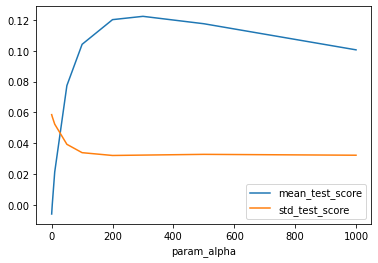

In [32]:
cv_results.plot.line(x="param_alpha", y=["mean_test_score", "std_test_score"])

Although it may be difficult the exact parameter at which **r-squared** is greatest, we can roughly see that a higher alpha increases performance up to an alpha between 200 and 300 and then decreases again (we know from the exact values in the table that alpha=300 gives use the best score, but in a larger, more fine-grained grid this may not be as easy to see).

Conveniently, since the GridSearchCV had the **"refit"** parameter set to True, it already also selects the best scoring model and refits it on all of the data we gave it, so that we can now use it directly for further testing. We can check the best model and its parameters as follows:

In [33]:
gridsearchcv.best_estimator_

Ridge(alpha=300)

In [34]:
gridsearchcv.best_params_

{'alpha': 300}

Obviously, it's a RidgeClassifier, but we can also see that the alpha value fitted for the best model, corresponds to the alpha parameter for which we can see the highest score in the **cv_results** table. Let us now try to evaluate this best model on the final holdout set:

In [35]:
holdout_predictions_gscv = gridsearchcv.predict(X_holdout)

In [36]:
from sklearn.metrics import r2_score

r2_score(y_holdout, holdout_predictions_gscv)

0.12744537475411344

Let us also quickly plot the predicted values versus the actual observed values in a scatter plot to see what our data looks like. Let us for this import seaborns regplot, which lends itself quite nicely to these types of plots:

<AxesSubplot: xlabel='predicted', ylabel='observed'>

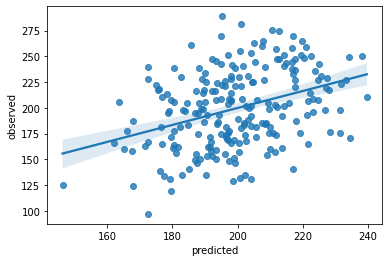

In [37]:
import seaborn as sns

predictions_vs_observed = pd.DataFrame(
    {
        "predicted": holdout_predictions_gscv,
        "observed": y_holdout
    }
)
sns.regplot(data=predictions_vs_observed, x="predicted", y="observed")

# Exercises

1. Do a similar grid search for other model families of your choice. Can you search grids with multiple hyperparameters (rather than just the one alpha parameter that we used in the example)?


# Additional Reading or Ressources


The scikit-learn user guide has some good explanations on these topics in its user guide. For example you can look at:

* [computing cross-validated metrics](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)
* [Tuning hyper-parameters using grid search](https://scikit-learn.org/stable/modules/grid_search.html)
* [This article talks a bit more about train-test split evaluation](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

* The scikit-learn user guide has some explanations and demonstrations of the above mentioned models [here](https://scikit-learn.org/stable/supervised_learning.html) and it usually links to some relevant papers or books as well.
It is well worth trying to read and understand as much as possible about the individual algorithms you are planning to use in your research.

# Sklearn's pipeline

Since we often want to apply preprocessing steps before fitting our models, and we want to do so in a cross-validation consistent way, so that we avoid data leakage and over-optimistic accuracy estimates. We need an easy way to chain different pipeline steps. The scikit-learn **pipeline** object provides just that.

Check out its documentation below:

In [38]:
from sklearn.pipeline import Pipeline
?Pipeline

The main parameter we care about is the **"steps"** parameter. As the name (and the description) suggests, it is a list of the steps that we want to apply in our pipeline. Let's imagine for example, that we want to make a pipeline in which we first perform a **principal component analysis (PCA)** to extract components, and then fit a **Support Vector Regression (SVR)** on only those extracted components. This may be quite complicated to implement in code especially if we also want to do some hyperparameter tuning in a cross-validated grid search, but combining the two steps in a pipeline makes it much more convenient.

First let's prepare the PCA and the SVR:

In [39]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR

pca = PCA()
svr = SVR()

Let's also check out the hyperparameters for the SVR:

In [40]:
?SVR

There are number of different kernels, degrees (for the polynomial kernel), gamma, and C values (you can see already, hyperparameter tuning can get increasingly difficult and complex the more models you start considering). Let us try an SVR with a **"rbf"** kernel and some different values for gamma and C. We also want to set a number of components to extract with the pca. The way we define a grid in a pipeline is to **name the keys of the dictionary** using the **name of the step** and the **name of the parameter** separated by a **double underscore**:

**nameofstep__nameofparameter**

In [41]:
pca_svr_grid = {
    "pca__n_components": [5, 50, 500],
    "svr__kernel": ["rbf"],
    "svr__C": np.linspace(0.0001, 1000, 5),
    "svr__gamma": np.linspace(0.001, 1000, 5)
}

We also need to define an additional grid to perform the same pipeline without any PCA, as this will be an important setting to try as well:

In [42]:
no_pca_svr_grid = {
    "pca": ["passthrough"],
    "svr__kernel": ["rbf"],
    "svr__C": np.linspace(0.0001, 1000, 5),
    "svr__gamma": np.linspace(0.001, 1000, 5)
}

Check out the example below and you can see it is really quite simple (Running it will take quite some time):

In [43]:
steps = [("pca", pca), ("svr", svr)]
pipeline = Pipeline(steps=steps)
gridsearch_pipeline = GridSearchCV(
    estimator=pipeline,
    param_grid=[pca_svr_grid, no_pca_svr_grid],
    cv=KFold(n_splits=5, shuffle=True, random_state=100),
    scoring="r2",
    n_jobs=-1, # for speed up run on all cores
)
gridsearch_pipeline.fit(X_model_selection, y_model_selection)
cv_results = pd.DataFrame(gridsearch_pipeline.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_svr__C,param_svr__gamma,param_svr__kernel,param_pca,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.344997,0.035439,0.010735,0.001336,5,0.0001,0.001,rbf,NaN,"{'pca__n_components': 5, 'svr__C': 0.0001, 'sv...",-0.007337,-0.000096,-0.065604,-0.023552,-0.011047,-0.021527,0.023312,82
1,0.329033,0.010620,0.010862,0.001623,5,0.0001,250.00075,rbf,NaN,"{'pca__n_components': 5, 'svr__C': 0.0001, 'sv...",-0.007337,-0.000098,-0.065605,-0.023550,-0.011048,-0.021527,0.023313,98
2,0.348918,0.019342,0.015198,0.005146,5,0.0001,500.0005,rbf,NaN,"{'pca__n_components': 5, 'svr__C': 0.0001, 'sv...",-0.007337,-0.000098,-0.065605,-0.023550,-0.011048,-0.021527,0.023313,83
3,0.348465,0.026249,0.011497,0.001581,5,0.0001,750.00025,rbf,NaN,"{'pca__n_components': 5, 'svr__C': 0.0001, 'sv...",-0.007337,-0.000098,-0.065605,-0.023550,-0.011048,-0.021527,0.023313,83
4,0.317572,0.007460,0.010818,0.000607,5,0.0001,1000.0,rbf,NaN,"{'pca__n_components': 5, 'svr__C': 0.0001, 'sv...",-0.007337,-0.000098,-0.065605,-0.023550,-0.011048,-0.021527,0.023313,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.179100,0.064937,1.259825,0.014861,NaN,1000.0,0.001,rbf,passthrough,"{'pca': 'passthrough', 'svr__C': 1000.0, 'svr_...",0.108169,0.065767,0.121182,0.114694,0.034741,0.088911,0.033308,2
96,3.383804,0.132781,1.293652,0.068419,NaN,1000.0,250.00075,rbf,passthrough,"{'pca': 'passthrough', 'svr__C': 1000.0, 'svr_...",-0.000297,-0.013109,-0.018804,-0.000004,-0.000176,-0.006478,0.007947,15
97,3.324081,0.119600,1.217988,0.075897,NaN,1000.0,500.0005,rbf,passthrough,"{'pca': 'passthrough', 'svr__C': 1000.0, 'svr_...",-0.000297,-0.013109,-0.018804,-0.000004,-0.000176,-0.006478,0.007947,15
98,3.273574,0.128566,1.286684,0.065236,NaN,1000.0,750.00025,rbf,passthrough,"{'pca': 'passthrough', 'svr__C': 1000.0, 'svr_...",-0.000297,-0.013109,-0.018804,-0.000004,-0.000176,-0.006478,0.007947,15


This results in quite a big table. We can quickly find the best row using the pandas **.query()** method:

In [44]:
cv_results.query("rank_test_score == 1")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_svr__C,param_svr__gamma,param_svr__kernel,param_pca,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,3.124602,0.040057,1.244989,0.031964,NaN,250.000075,0.001,rbf,passthrough,"{'pca': 'passthrough', 'svr__C': 250.000075, '...",0.112152,0.079351,0.132417,0.103213,0.024335,0.090294,0.03712,1


We can also think about visualising our hyperparameters using some heatmaps (we can make one heatmap for each n_components setting since we can plot the parameters gamma and C on a 2D grid):

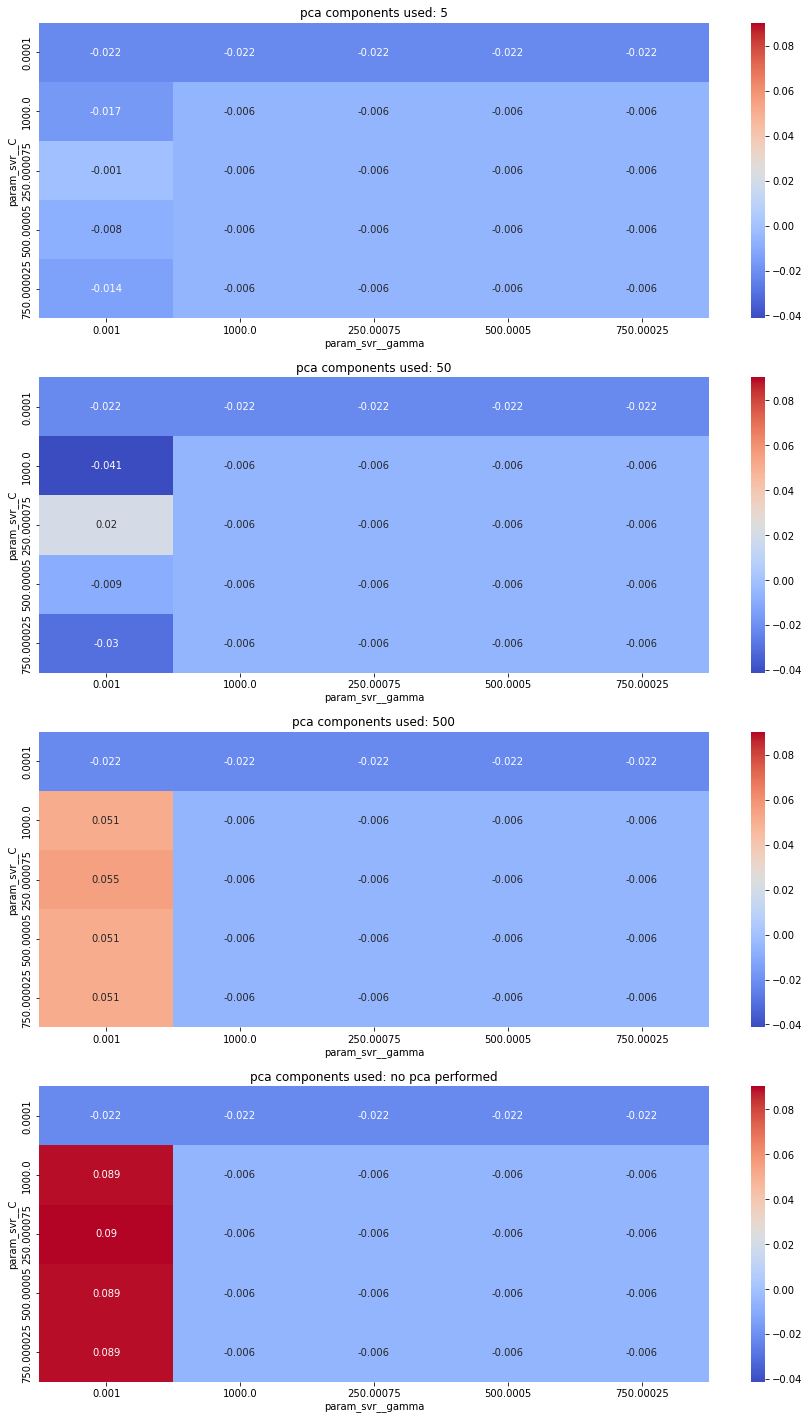

In [45]:
import matplotlib.pyplot as plt

# rename the rows where no pca was performed
cv_results["param_pca__n_components"] = cv_results["param_pca__n_components"].replace(
    {np.nan: "no pca performed"}
)

# prepare a figure
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(15, 25))

# Loop over every PCA parameter to make one subplot for each PCA setting
for i, pca_n_comps in enumerate(cv_results["param_pca__n_components"].unique()):
    mask = cv_results["param_pca__n_components"] == pca_n_comps
    subsampled_results = cv_results.loc[mask][["param_svr__C", "param_svr__gamma", "mean_test_score"]]
    
    # we do this only because we want to annoying pandas warning about infering
    # numeric data type, we don't care about this being numeric in the plot, as
    # it represents our xtick and ytick labels
    indices = ["param_svr__C", "param_svr__gamma"]
    subsampled_results[indices] = subsampled_results[indices].astype(str)
    
    # this will reshape the data from a "long" to a "wide" format so we can represent
    # it in a heatmap with one parameter on the x axis and one parameter on the y axis
    heatmap_array = subsampled_results.pivot(
        index="param_svr__C", columns="param_svr__gamma", values="mean_test_score"
    ).round(decimals=3)
    
    # this actually makes the subplot
    axs[i].set_title(f"pca components used: {pca_n_comps}")
    sns.heatmap(
        heatmap_array,
        ax=axs[i],
        cmap="coolwarm",
        vmin=cv_results["mean_test_score"].min(),
        vmax=cv_results["mean_test_score"].max(),
        annot=True
    )

Over time you may find that these type of visualisations can be quite helpful when searching over some hyperparameter grids. For example, here we can quickly see that performance is best when not using PCA or when extracting a lot of components rather than only a few.

These kind of visualisations can also help identifz problems with the grid. For example if we find that best performing hyperparameters tend to be towards the boundaries we may want to expand our search grid to include more candidate values. For example in this particular instance we may want to include larger C values to see if we hit a plateau or whether scores will further increase or decrease.

**Importantly**, however, keep in mind that these scores above **are not** final evaluation scores. They merely serve to compare different model candidates, but will be over-optimistic as evaluation scores. **We have to still take the best model and evaluate it on some data that so far the model has not seen.** Let's do this using the GridSearchCV object, which again, has refit the best model on all the training data:

In [46]:
gridsearch_pipeline.best_estimator_

Pipeline(steps=[('pca', 'passthrough'),
                ('svr', SVR(C=250.000075, gamma=0.001))])

In [47]:
holdout_predictions = gridsearch_pipeline.predict(X_holdout)
pipeline_score = r2_score(y_holdout, holdout_predictions)
pipeline_score

0.05631033227755544

Don't be surprised if the score as gone down a bit: This is precisely what is meant when we say that the estimated score during model selection is over-optimistic. If the score drops by a lot, however, this is a good sign that we overfit the model during model selection. Let's quickly plot those predictions again:

<AxesSubplot: xlabel='predicted', ylabel='observed'>

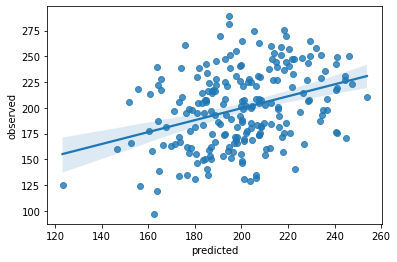

In [48]:
predictions_vs_observed = pd.DataFrame(
    {
        "predicted": holdout_predictions,
        "observed": y_holdout
    }
)
sns.regplot(data=predictions_vs_observed, x="predicted", y="observed")

# Exercise:

1. One very popular method of preprocessing where data leakage can happen quite easily is feature selection. Take one of the feature selection methods [in-built in scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) and add it to a pipeline with a regressor of your choice. Can you do hyperparameter tuning for the feature selection process and the estimator simultaneously?
Hint: check out the scikit-learn user guide to see [how you can use an F-test to select relevant features here](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

# Bonus Material: How to perform a cross-validated grid search for both **model family** and **hyperparameters** simultaneously?

Since we usually want to select the best model for a given problem from a set of **different model families** and their **associated hyperparameters**, you may now wonder how to do this with the GridSearchCV. We can see easily how it is done with one estimator, but it is not easy to see how to do this with a set of different estimators. This is another use case where the scikit-learn pipeline object can come in quite handy!

We can initialise a pipeline with an estimator as a step, and then replace **this estimator** in the **pipeline** with **other type of estimators** using different parameter grids in our **GridSearchCV**, very similar to the way in which we tested the pipeline with and without PCA in the previous example:

In [49]:
# We only define one step, we care only about the regressor and its hyperparameters.
# We arbitrarily initialise the pipeline with ridge:
pipeline = Pipeline(steps=[("regressor", Ridge())])

# parameters for the ridge regressor
ridge_params = {
    "regressor": [Ridge()], # parameters have to be handed over as iterables!
    "regressor__alpha": np.linspace(0.0001, 1000, 10),
}

# parameters for the support vector regressor:
svr_params = {
    "regressor": [SVR()],
    "regressor__C": np.linspace(0.0001, 1000, 10),
    "regressor__kernel": ["linear", "rbf"],
}

After defining the estimators, the pipeline, and the parameter grids we can put it all together as follows and run the search. This may take a few minutes:

In [50]:
gridsearch_cv = GridSearchCV(
    estimator=pipeline,
    param_grid=[ridge_params, svr_params],
    scoring="r2",
    cv=kfold,
    n_jobs=-1 # to speed up computation, '-1' means it will use all available CPU's
)
gridsearch_cv.fit(X_model_selection, y_model_selection)
pd.DataFrame(gridsearch_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__alpha,param_regressor__C,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.198773,0.007359,0.003282,0.000918,Ridge(alpha=333.3334),0.0001,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.036955,0.008344,-0.017768,0.054646,-0.112232,-0.006011,0.058571,28
1,0.198434,0.004307,0.003722,0.001225,Ridge(alpha=333.3334),111.1112,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.122294,0.101077,0.146536,0.120542,0.047520,0.107594,0.033321,7
2,0.202157,0.011982,0.003459,0.000612,Ridge(alpha=333.3334),222.2223,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.127723,0.117699,0.174037,0.113511,0.073996,0.121393,0.032043,2
3,0.233615,0.033316,0.003225,0.000795,Ridge(alpha=333.3334),333.3334,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.125706,0.122101,0.178937,0.101330,0.082458,0.122107,0.032392,1
4,0.210147,0.020568,0.002776,0.000407,Ridge(alpha=333.3334),444.4445,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.122221,0.122461,0.176938,0.089899,0.085606,0.119425,0.032681,3
5,0.187025,0.004526,0.002947,0.000667,Ridge(alpha=333.3334),555.5556,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.118482,0.121125,0.172440,0.079992,0.086615,0.115731,0.032795,4
6,0.186994,0.003231,0.003291,0.000643,Ridge(alpha=333.3334),666.6667,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.114819,0.119002,0.167042,0.071531,0.086598,0.111798,0.032770,5
7,0.187233,0.001392,0.003189,0.000388,Ridge(alpha=333.3334),777.7778,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.111333,0.116506,0.161409,0.064298,0.086034,0.107916,0.032644,6
8,0.189505,0.014499,0.003016,0.000689,Ridge(alpha=333.3334),888.8889,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.108048,0.113846,0.155836,0.058080,0.085161,0.104194,0.032446,17
9,0.197631,0.009045,0.003876,0.000635,Ridge(alpha=333.3334),1000.0,NaN,NaN,"{'regressor': Ridge(alpha=333.3334), 'regresso...",0.104963,0.111137,0.150456,0.052698,0.084106,0.100672,0.032194,18


Let's evaluate again the best model on the holdout data:

In [51]:
gridsearch_cv.best_estimator_

Pipeline(steps=[('regressor', Ridge(alpha=333.3334))])

In [52]:
gscv_predictions = gridsearch_cv.predict(X_holdout)
r2_score(y_holdout, gscv_predictions)

0.1310762323208764

<AxesSubplot: xlabel='predicted', ylabel='observed'>

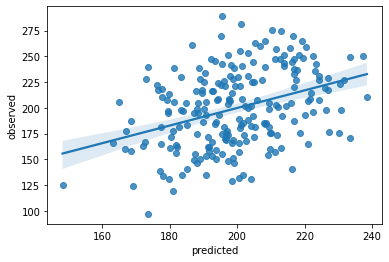

In [53]:
predictions_vs_observed = pd.DataFrame(
    {
        "predicted": gscv_predictions,
        "observed": y_holdout
    }
)
sns.regplot(data=predictions_vs_observed, x="predicted", y="observed")